In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [8]:
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

In [24]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    plt.imshow(x_train[5])
    plt.show()
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

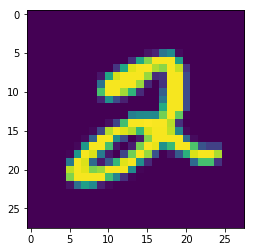

(60000, 784)


In [25]:
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

In [11]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [12]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)               803600    
Total para

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
___________________________

In [27]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [28]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

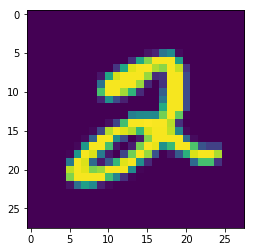

Epoch 1


  0%|                                                                                          | 0/128 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:09<00:00, 13.68it/s]


Epoch 2


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.71it/s]


Epoch 3


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.44it/s]


Epoch 4


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.86it/s]


Epoch 5


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.50it/s]


Epoch 6


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.47it/s]


Epoch 7


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.07it/s]


Epoch 8


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.85it/s]


Epoch 9


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.10it/s]


Epoch 10


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.14it/s]


Epoch 11


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.28it/s]


Epoch 12


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.60it/s]


Epoch 13


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.93it/s]


Epoch 14


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.27it/s]


Epoch 15


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.12it/s]


Epoch 16


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.33it/s]


Epoch 17


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.26it/s]


Epoch 18


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.39it/s]


Epoch 19


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.06it/s]


Epoch 20


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.39it/s]


Epoch 21


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.00it/s]


Epoch 22


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.30it/s]


Epoch 23


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.80it/s]


Epoch 24


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 76.69it/s]


Epoch 25


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.62it/s]


Epoch 26


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.48it/s]


Epoch 27


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.93it/s]


Epoch 28


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.12it/s]


Epoch 29


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.23it/s]


Epoch 30


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.79it/s]


Epoch 31


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.14it/s]


Epoch 32


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.89it/s]


Epoch 33


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 70.27it/s]


Epoch 34


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.39it/s]


Epoch 35


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 72.60it/s]


Epoch 36


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.76it/s]


Epoch 37


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.04it/s]


Epoch 38


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.54it/s]


Epoch 39


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.96it/s]


Epoch 40


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.79it/s]


Epoch 41


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.88it/s]


Epoch 42


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.93it/s]


Epoch 43


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.87it/s]


Epoch 44


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.36it/s]


Epoch 45


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.88it/s]


Epoch 46


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.21it/s]


Epoch 47


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.39it/s]


Epoch 48


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.27it/s]


Epoch 49


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.15it/s]


Epoch 50


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.00it/s]


Epoch 51


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.94it/s]


Epoch 52


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.21it/s]


Epoch 53


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.38it/s]


Epoch 54


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.87it/s]


Epoch 55


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.43it/s]


Epoch 56


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.03it/s]


Epoch 57


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.03it/s]


Epoch 58


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.58it/s]


Epoch 59


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.38it/s]


Epoch 60


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.42it/s]


Epoch 61


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.60it/s]


Epoch 62


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 76.10it/s]


Epoch 63


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.67it/s]


Epoch 64


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.21it/s]


Epoch 65


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.60it/s]


Epoch 66


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.66it/s]


Epoch 67


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.36it/s]


Epoch 68


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.37it/s]


Epoch 69


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.85it/s]


Epoch 70


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.44it/s]


Epoch 71


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.53it/s]


Epoch 72


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.37it/s]


Epoch 73


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.13it/s]


Epoch 74


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.00it/s]


Epoch 75


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.69it/s]


Epoch 76


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.17it/s]


Epoch 77


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.50it/s]


Epoch 78


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.42it/s]


Epoch 79


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.69it/s]


Epoch 80


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.46it/s]


Epoch 81


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.70it/s]


Epoch 82


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.00it/s]


Epoch 83


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 72.83it/s]


Epoch 84


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.67it/s]


Epoch 85


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 76.76it/s]


Epoch 86


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.48it/s]


Epoch 87


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.46it/s]


Epoch 88


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.88it/s]


Epoch 89


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.63it/s]


Epoch 90


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.11it/s]


Epoch 91


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.47it/s]


Epoch 92


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.38it/s]


Epoch 93


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.21it/s]


Epoch 94


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.23it/s]


Epoch 95


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.49it/s]


Epoch 96


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.66it/s]


Epoch 97


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.12it/s]


Epoch 98


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.35it/s]


Epoch 99


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.64it/s]


Epoch 100


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.84it/s]


Epoch 101


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.87it/s]


Epoch 102


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.49it/s]


Epoch 103


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.68it/s]


Epoch 104


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.26it/s]


Epoch 105


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.36it/s]


Epoch 106


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.24it/s]


Epoch 107


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.21it/s]


Epoch 108


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.20it/s]


Epoch 109


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.32it/s]


Epoch 110


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.76it/s]


Epoch 111


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.15it/s]


Epoch 112


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.02it/s]


Epoch 113


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.40it/s]


Epoch 114


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.09it/s]


Epoch 115


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.41it/s]


Epoch 116


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.65it/s]


Epoch 117


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.33it/s]


Epoch 118


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.21it/s]


Epoch 119


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.49it/s]


Epoch 120


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.60it/s]


Epoch 121


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.47it/s]


Epoch 122


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.77it/s]


Epoch 123


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.55it/s]


Epoch 124


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.09it/s]


Epoch 125


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.83it/s]


Epoch 126


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.85it/s]


Epoch 127


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.79it/s]


Epoch 128


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.36it/s]


Epoch 129


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.04it/s]


Epoch 130


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.44it/s]


Epoch 131


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.09it/s]


Epoch 132


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.69it/s]


Epoch 133


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.66it/s]


Epoch 134


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.92it/s]


Epoch 135


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.92it/s]


Epoch 136


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.75it/s]


Epoch 137


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.74it/s]


Epoch 138


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.35it/s]


Epoch 139


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 71.75it/s]


Epoch 140


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.72it/s]


Epoch 141


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.60it/s]


Epoch 142


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.58it/s]


Epoch 143


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 75.96it/s]


Epoch 144


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 74.12it/s]


Epoch 145


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.90it/s]


Epoch 146


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.68it/s]


Epoch 147


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.67it/s]


Epoch 148


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.53it/s]


Epoch 149


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.21it/s]


Epoch 150


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.10it/s]


Epoch 151


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.62it/s]


Epoch 152


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.00it/s]


Epoch 153


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.07it/s]


Epoch 154


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.10it/s]


Epoch 155


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.39it/s]


Epoch 156


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.14it/s]


Epoch 157


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.28it/s]


Epoch 158


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.28it/s]


Epoch 159


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.63it/s]


Epoch 160


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.55it/s]


Epoch 161


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.35it/s]


Epoch 162


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.90it/s]


Epoch 163


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 72.85it/s]


Epoch 164


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.26it/s]


Epoch 165


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.93it/s]


Epoch 166


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.13it/s]


Epoch 167


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.68it/s]


Epoch 168


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.63it/s]


Epoch 169


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.68it/s]


Epoch 170


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.77it/s]


Epoch 171


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.06it/s]


Epoch 172


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.06it/s]


Epoch 173


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.55it/s]


Epoch 174


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.94it/s]


Epoch 175


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.77it/s]


Epoch 176


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 75.80it/s]


Epoch 177


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.20it/s]


Epoch 178


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.86it/s]


Epoch 179


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.22it/s]


Epoch 180


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.22it/s]


Epoch 181


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.33it/s]


Epoch 182


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.25it/s]


Epoch 183


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.99it/s]


Epoch 184


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.56it/s]


Epoch 185


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.53it/s]


Epoch 186


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.53it/s]


Epoch 187


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.49it/s]


Epoch 188


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.38it/s]


Epoch 189


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 76.97it/s]


Epoch 190


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.28it/s]


Epoch 191


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.55it/s]


Epoch 192


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.76it/s]


Epoch 193


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.36it/s]


Epoch 194


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.62it/s]


Epoch 195


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.96it/s]


Epoch 196


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.11it/s]


Epoch 197


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.91it/s]


Epoch 198


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.79it/s]


Epoch 199


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.53it/s]


Epoch 200


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 86.11it/s]


Epoch 201


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.15it/s]


Epoch 202


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 86.09it/s]


Epoch 203


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.88it/s]


Epoch 204


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.62it/s]


Epoch 205


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.57it/s]


Epoch 206


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.46it/s]


Epoch 207


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.33it/s]


Epoch 208


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.40it/s]


Epoch 209


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.90it/s]


Epoch 210


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.72it/s]


Epoch 211


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.60it/s]


Epoch 212


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.71it/s]


Epoch 213


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 85.45it/s]


Epoch 214


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 86.02it/s]


Epoch 215


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.65it/s]


Epoch 216


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.59it/s]


Epoch 217


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 76.69it/s]


Epoch 218


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.22it/s]


Epoch 219


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.93it/s]


Epoch 220


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.67it/s]


Epoch 221


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.68it/s]


Epoch 222


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.62it/s]


Epoch 223


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 74.89it/s]


Epoch 224


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.21it/s]


Epoch 225


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.30it/s]


Epoch 226


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.24it/s]


Epoch 227


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.05it/s]


Epoch 228


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.63it/s]


Epoch 229


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.69it/s]


Epoch 230


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.34it/s]


Epoch 231


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.07it/s]


Epoch 232


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.10it/s]


Epoch 233


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.10it/s]


Epoch 234


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.10it/s]


Epoch 235


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.04it/s]


Epoch 236


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.75it/s]


Epoch 237


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.65it/s]


Epoch 238


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.99it/s]


Epoch 239


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.02it/s]


Epoch 240


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.08it/s]


Epoch 241


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.85it/s]


Epoch 242


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.14it/s]


Epoch 243


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.10it/s]


Epoch 244


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.38it/s]


Epoch 245


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.03it/s]


Epoch 246


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.25it/s]


Epoch 247


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.65it/s]


Epoch 248


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.49it/s]


Epoch 249


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.68it/s]


Epoch 250


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.27it/s]


Epoch 251


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.26it/s]


Epoch 252


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.02it/s]


Epoch 253


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.54it/s]


Epoch 254


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.21it/s]


Epoch 255


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.48it/s]


Epoch 256


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.15it/s]


Epoch 257


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.38it/s]


Epoch 258


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.38it/s]


Epoch 259


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.27it/s]


Epoch 260


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.16it/s]


Epoch 261


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.36it/s]


Epoch 262


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.44it/s]


Epoch 263


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.29it/s]


Epoch 264


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.99it/s]


Epoch 265


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.06it/s]


Epoch 266


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.35it/s]


Epoch 267


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.92it/s]


Epoch 268


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.83it/s]


Epoch 269


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.33it/s]


Epoch 270


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.98it/s]


Epoch 271


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.04it/s]


Epoch 272


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.10it/s]


Epoch 273


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.49it/s]


Epoch 274


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.17it/s]


Epoch 275


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.10it/s]


Epoch 276


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.60it/s]


Epoch 277


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.66it/s]


Epoch 278


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.68it/s]


Epoch 279


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.15it/s]


Epoch 280


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.99it/s]


Epoch 281


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.29it/s]


Epoch 282


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.24it/s]


Epoch 283


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.71it/s]


Epoch 284


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.95it/s]


Epoch 285


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.26it/s]


Epoch 286


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.37it/s]


Epoch 287


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.15it/s]


Epoch 288


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.81it/s]


Epoch 289


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.17it/s]


Epoch 290


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.07it/s]


Epoch 291


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.88it/s]


Epoch 292


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.49it/s]


Epoch 293


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.24it/s]


Epoch 294


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.37it/s]


Epoch 295


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.76it/s]


Epoch 296


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.89it/s]


Epoch 297


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.62it/s]


Epoch 298


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.07it/s]


Epoch 299


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.31it/s]


Epoch 300


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.18it/s]


Epoch 301


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.95it/s]


Epoch 302


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.15it/s]


Epoch 303


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.50it/s]


Epoch 304


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.77it/s]


Epoch 305


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.27it/s]


Epoch 306


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.68it/s]


Epoch 307


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.43it/s]


Epoch 308


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.27it/s]


Epoch 309


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.93it/s]


Epoch 310


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.15it/s]


Epoch 311


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.22it/s]


Epoch 312


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.48it/s]


Epoch 313


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.26it/s]


Epoch 314


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.38it/s]


Epoch 315


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.19it/s]


Epoch 316


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.93it/s]


Epoch 317


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.48it/s]


Epoch 318


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.33it/s]


Epoch 319


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.02it/s]


Epoch 320


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.60it/s]


Epoch 321


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.79it/s]


Epoch 322


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.38it/s]


Epoch 323


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.10it/s]


Epoch 324


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.91it/s]


Epoch 325


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.21it/s]


Epoch 326


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.13it/s]


Epoch 327


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.21it/s]


Epoch 328


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.81it/s]


Epoch 329


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.75it/s]


Epoch 330


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.15it/s]


Epoch 331


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.98it/s]


Epoch 332


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.25it/s]


Epoch 333


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.40it/s]


Epoch 334


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.13it/s]


Epoch 335


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.04it/s]


Epoch 336


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.10it/s]


Epoch 337


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.45it/s]


Epoch 338


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.70it/s]


Epoch 339


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.38it/s]


Epoch 340


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.93it/s]


Epoch 341


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.81it/s]


Epoch 342


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.47it/s]


Epoch 343


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.90it/s]


Epoch 344


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 75.45it/s]


Epoch 345


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.60it/s]


Epoch 346


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.06it/s]


Epoch 347


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.61it/s]


Epoch 348


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.77it/s]


Epoch 349


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.63it/s]


Epoch 350


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.79it/s]


Epoch 351


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.74it/s]


Epoch 352


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.61it/s]


Epoch 353


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.01it/s]


Epoch 354


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.93it/s]


Epoch 355


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.63it/s]


Epoch 356


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.71it/s]


Epoch 357


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.01it/s]


Epoch 358


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.53it/s]


Epoch 359


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.02it/s]


Epoch 360


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.72it/s]


Epoch 361


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.05it/s]


Epoch 362


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.93it/s]


Epoch 363


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.94it/s]


Epoch 364


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 72.73it/s]


Epoch 365


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.78it/s]


Epoch 366


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.06it/s]


Epoch 367


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.83it/s]


Epoch 368


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.39it/s]


Epoch 369


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.27it/s]


Epoch 370


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.50it/s]


Epoch 371


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.90it/s]


Epoch 372


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.78it/s]


Epoch 373


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.39it/s]


Epoch 374


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.45it/s]


Epoch 375


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.47it/s]


Epoch 376


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.47it/s]


Epoch 377


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 84.04it/s]


Epoch 378


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.39it/s]


Epoch 379


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.02it/s]


Epoch 380


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.95it/s]


Epoch 381


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 80.50it/s]


Epoch 382


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.39it/s]


Epoch 383


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.69it/s]


Epoch 384


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.81it/s]


Epoch 385


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.31it/s]


Epoch 386


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.95it/s]


Epoch 387


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.29it/s]


Epoch 388


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 78.83it/s]


Epoch 389


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 79.75it/s]


Epoch 390


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.45it/s]


Epoch 391


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.74it/s]


Epoch 392


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.34it/s]


Epoch 393


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.31it/s]


Epoch 394


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.79it/s]


Epoch 395


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.41it/s]


Epoch 396


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.94it/s]


Epoch 397


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.63it/s]


Epoch 398


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 83.82it/s]


Epoch 399


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 81.71it/s]


Epoch 400


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 82.68it/s]
c:\users\josue\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


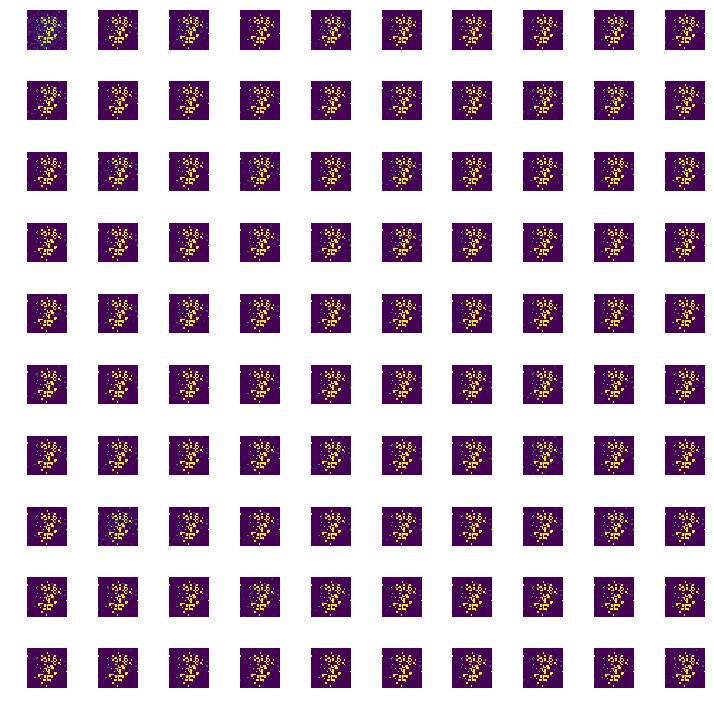

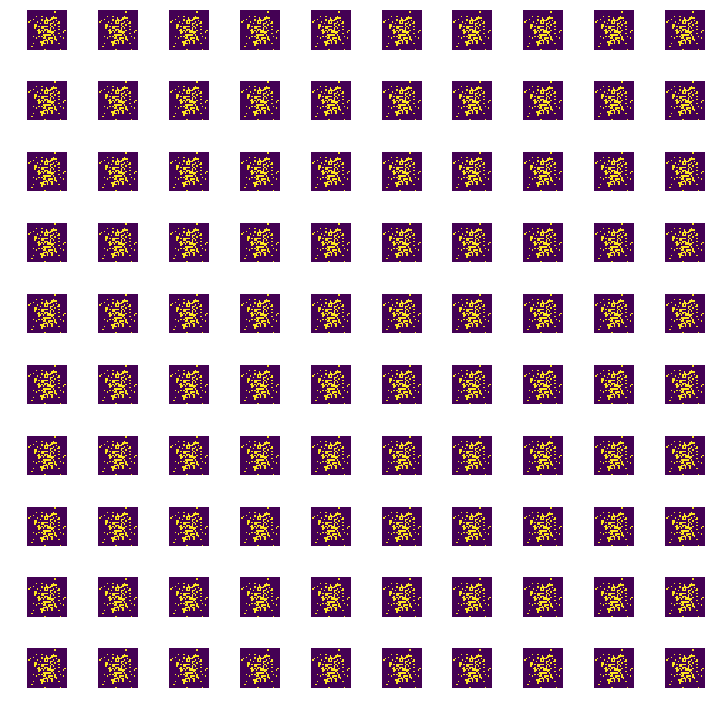

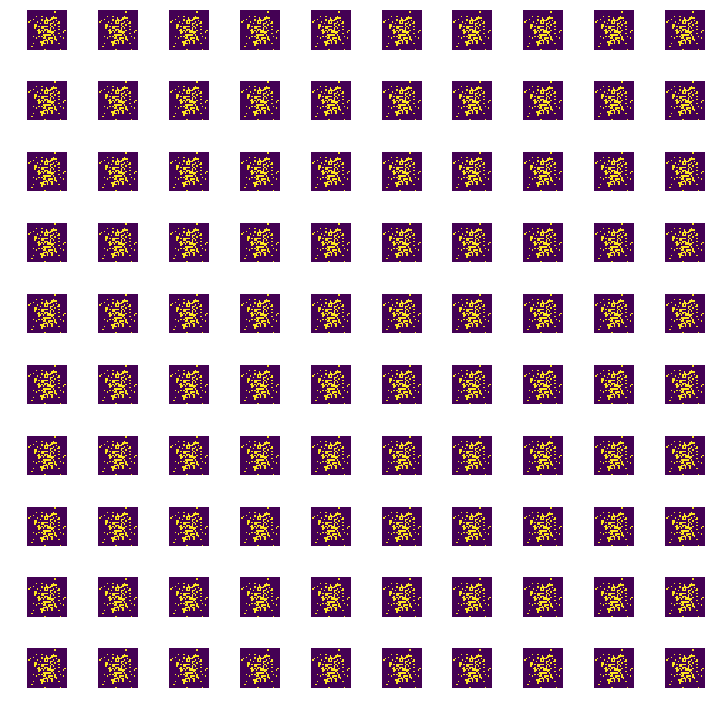

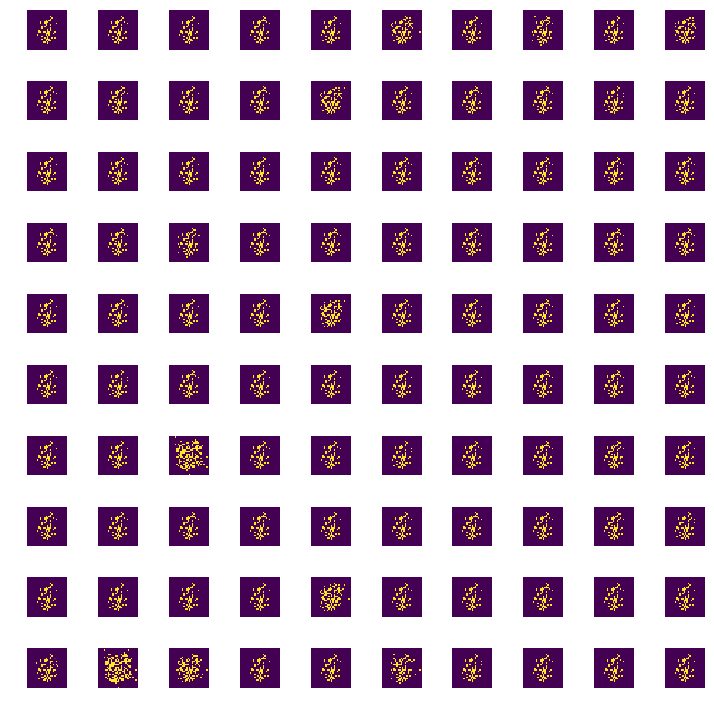

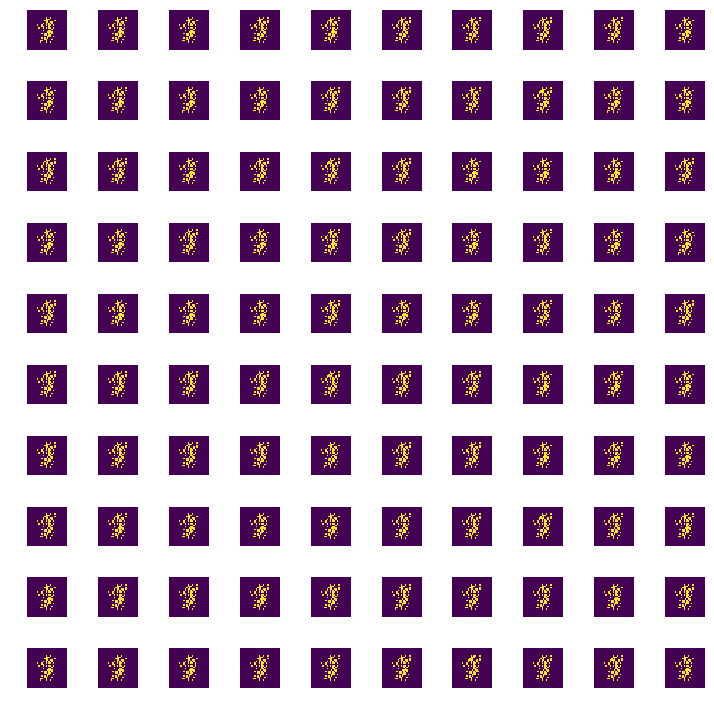

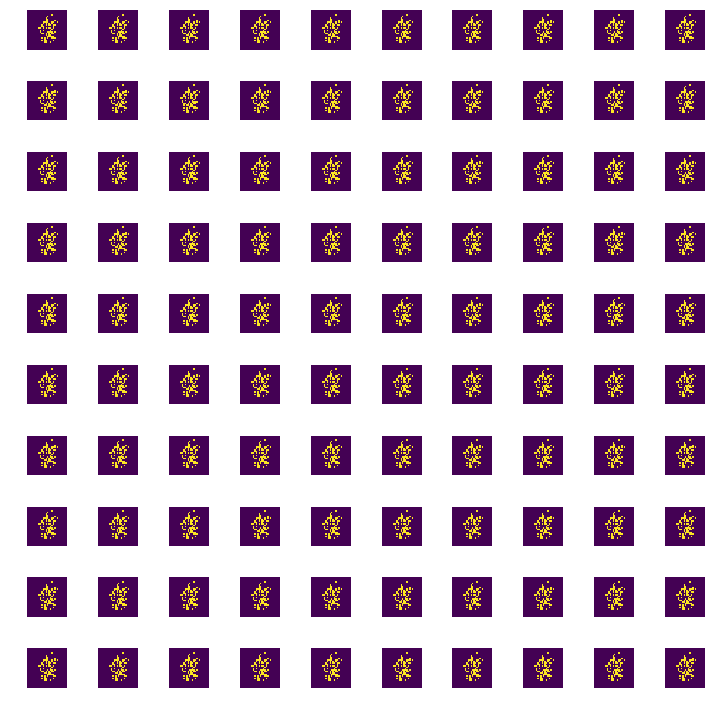

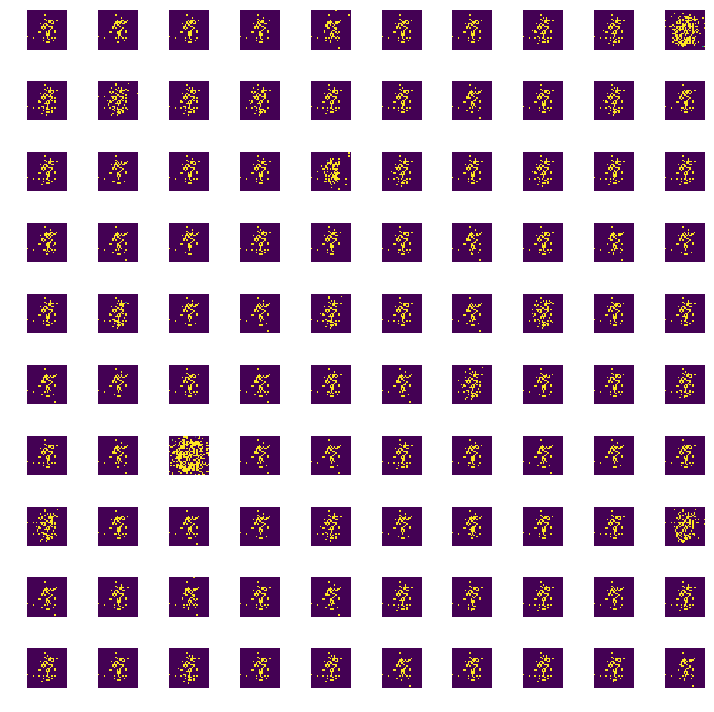

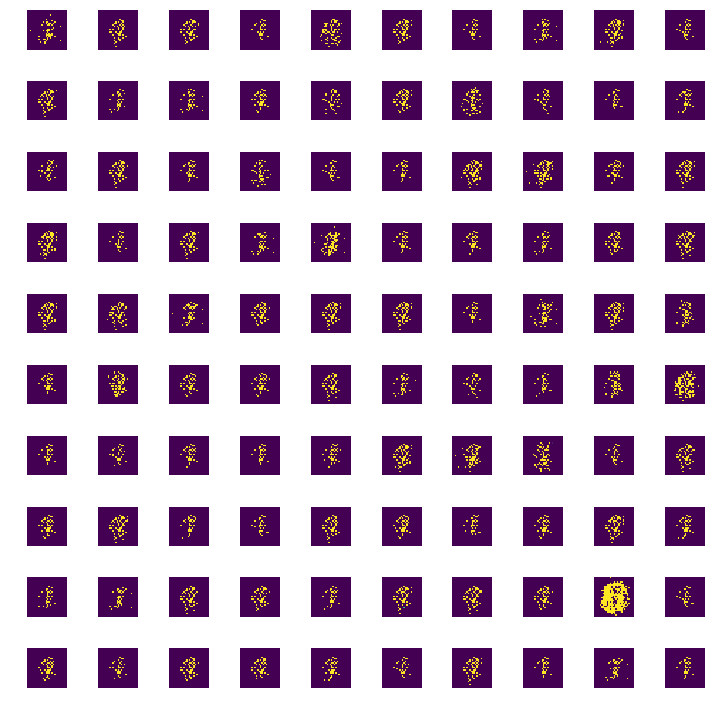

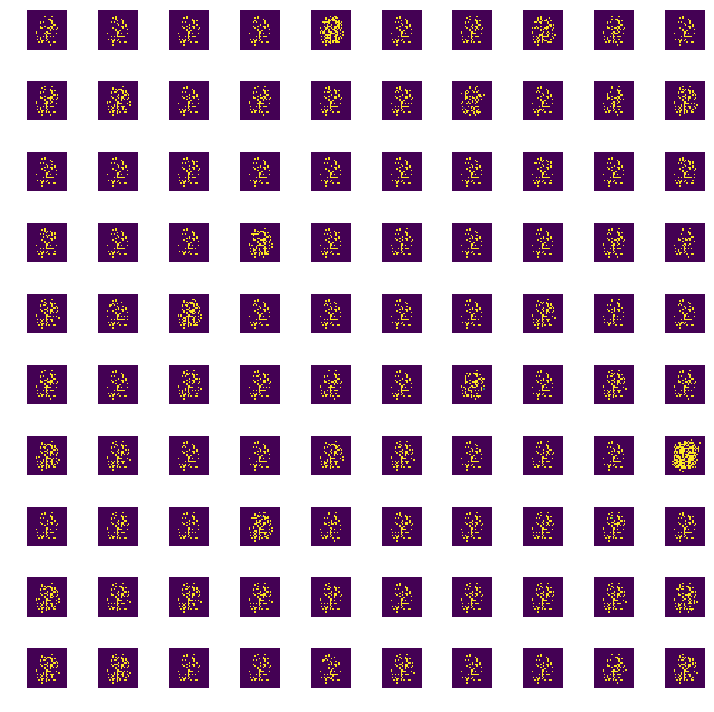

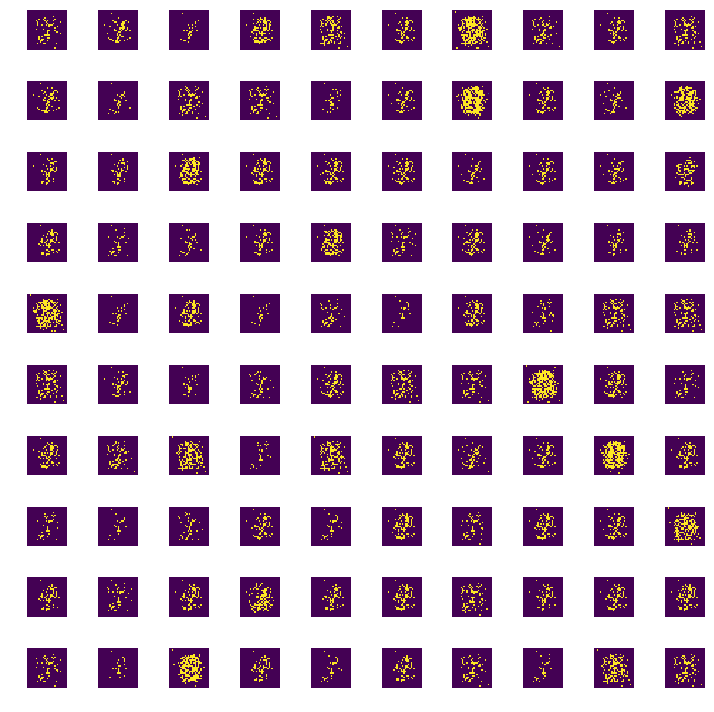

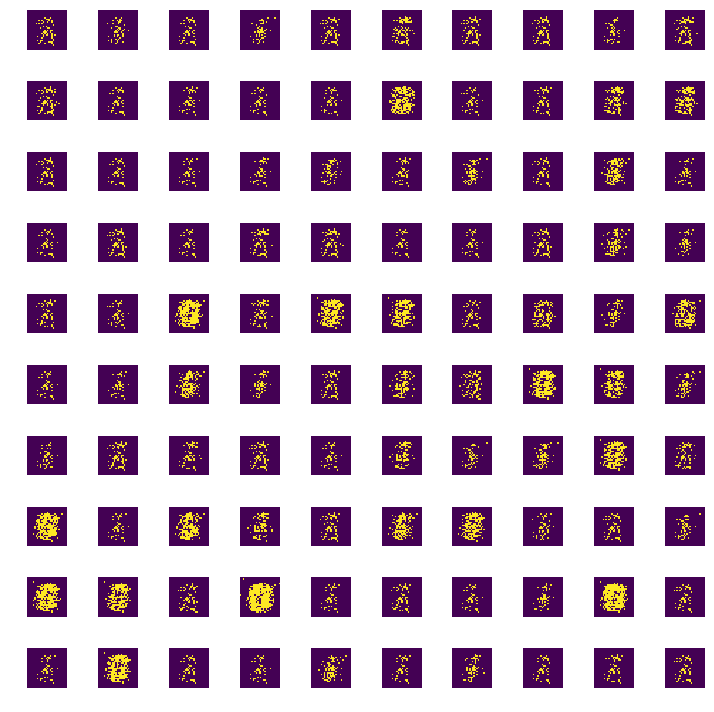

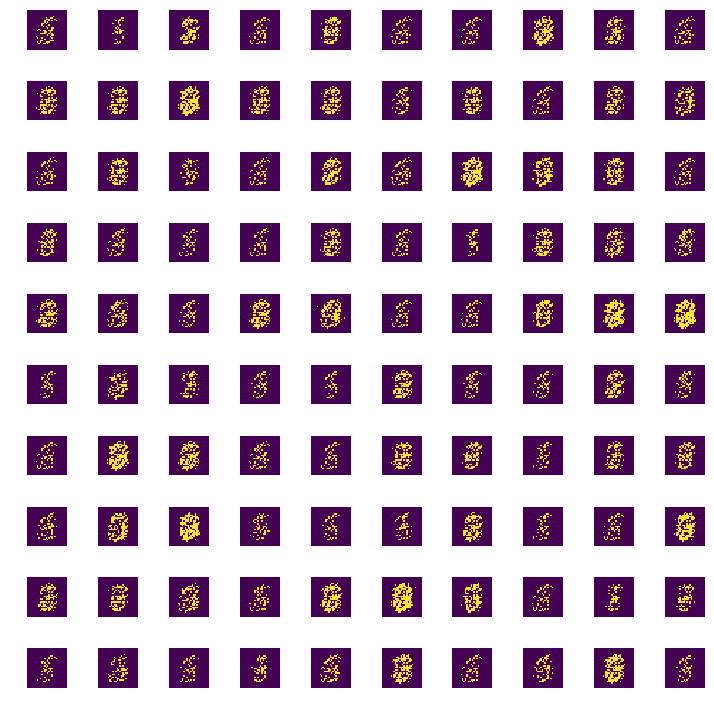

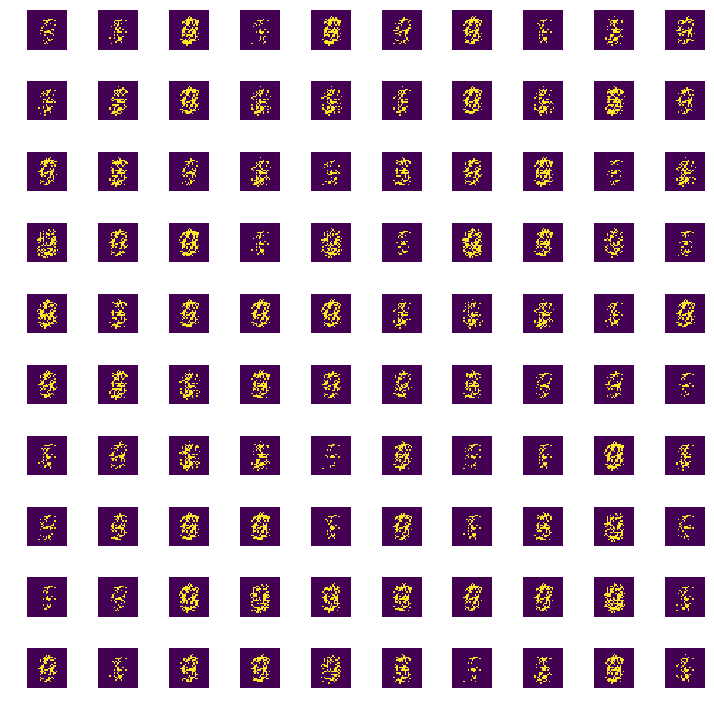

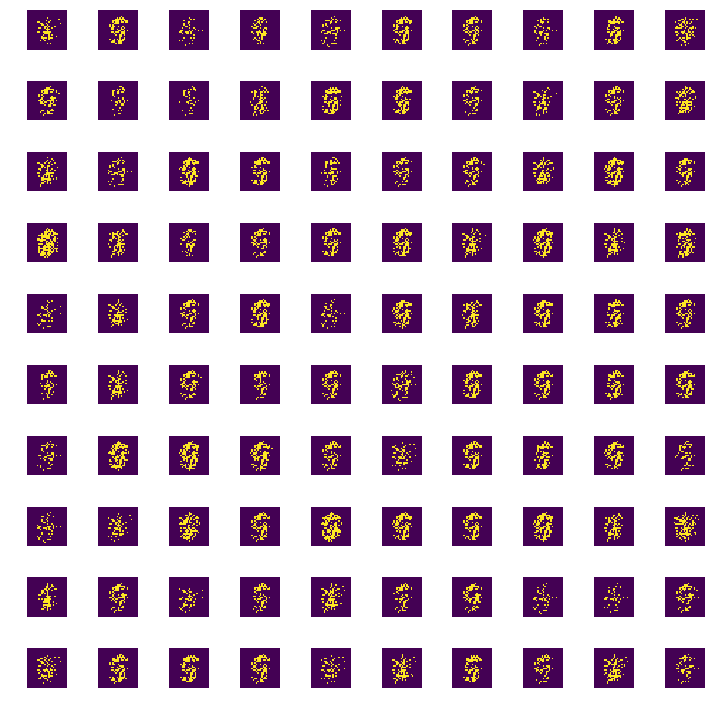

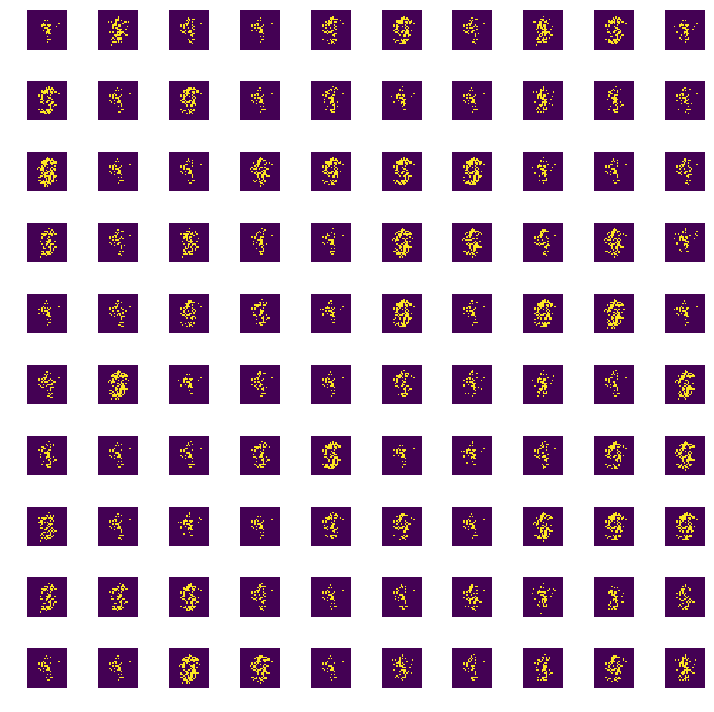

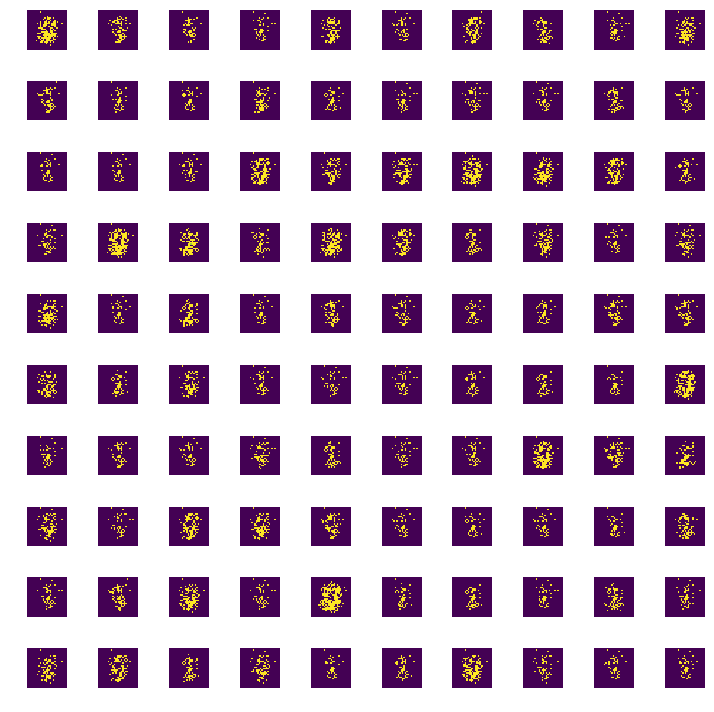

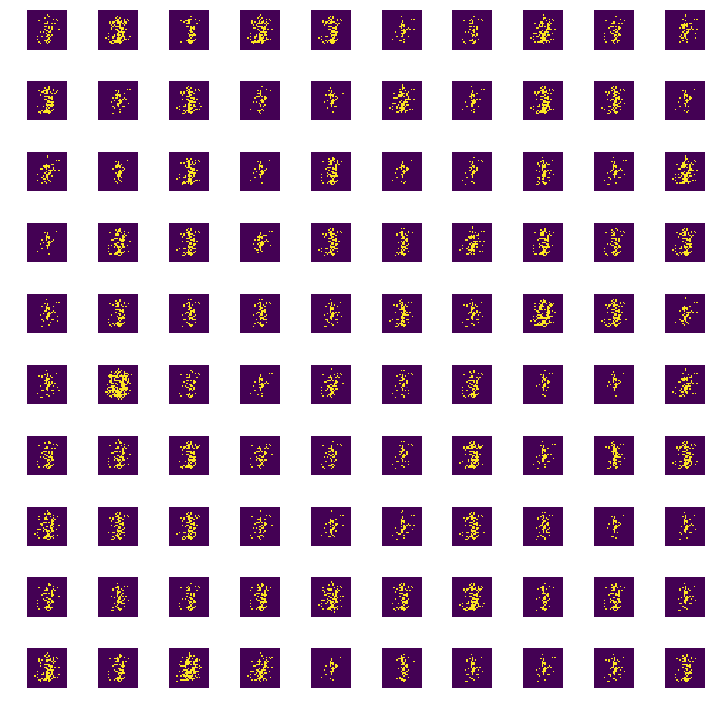

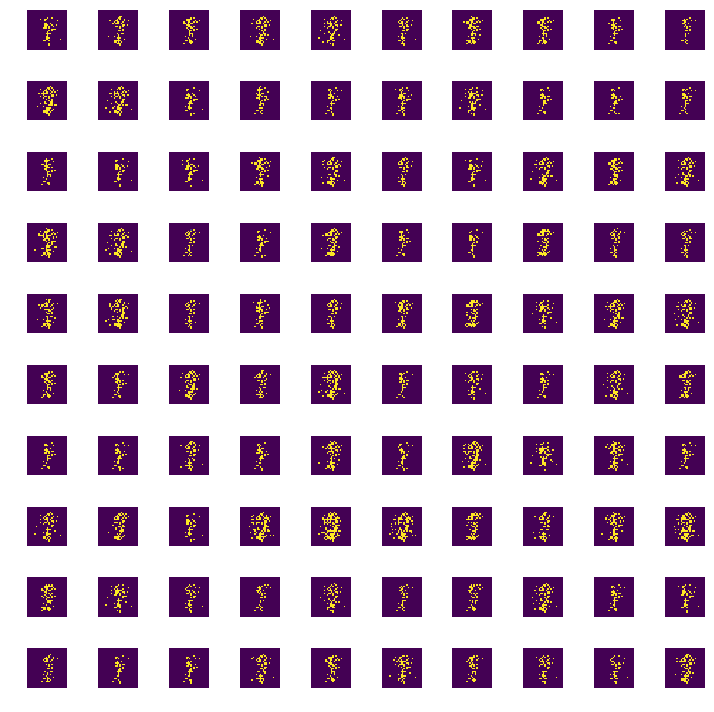

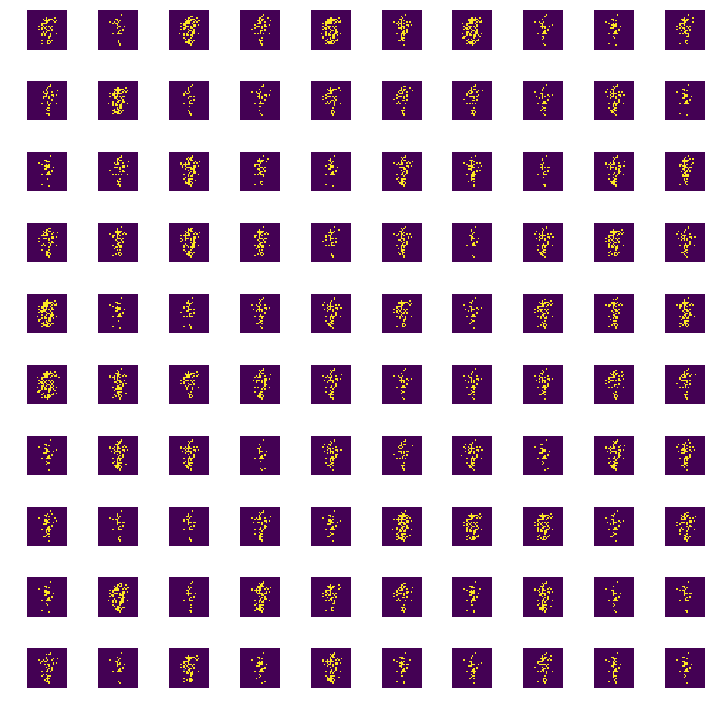

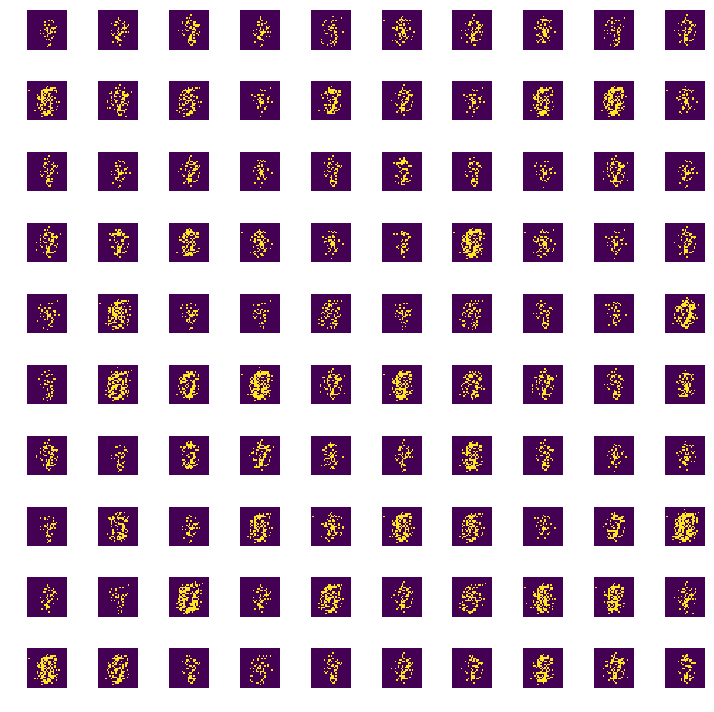

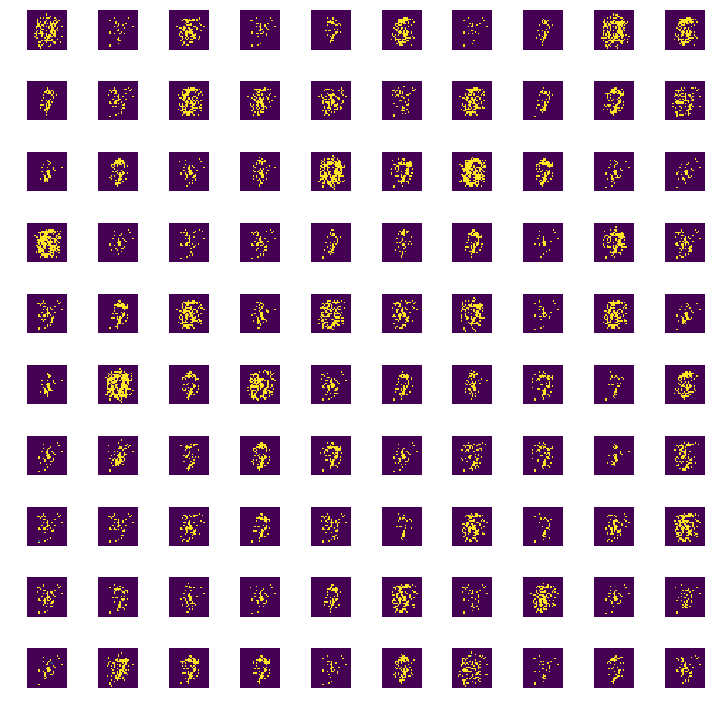

In [29]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(100,128)